C:\Users\gebha\AppData\Roaming\Python\Python313\site-packages\dynamiqs\qarrays\qarray.py:484: UserWarning: A sparse qarray has been converted to dense layout due to element-wise addition with a dense qarray.
  return self + (-y)
|██████████| 100.0% ◆ elapsed 57.82ms ◆ remaining 0.00ms
100%|██████████| 50/50 [00:03<00:00, 15.82it/s]


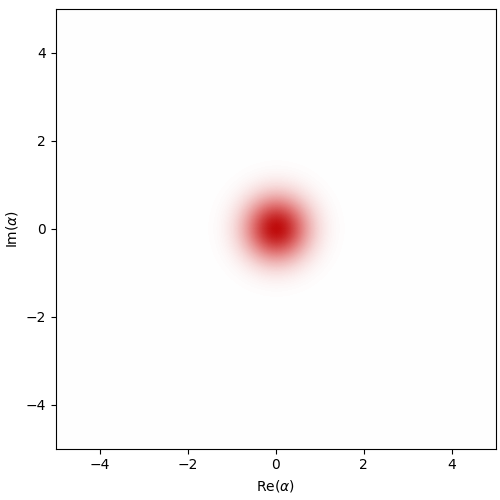

In [2]:
import dynamiqs as dq
import jax
import jax.numpy as jnp # the JAX version of numpy
from matplotlib import pyplot as plt
import numpy as np

jax.devices()
dq.set_device('cpu')

dq.set_precision('simple')

g2 = 1 #chlling
eps = -4
Kb = 10

na = 20 # Hilbert space dimension
a = dq.destroy(na) # annihilaiton operator
psi0 = dq.fock(na, 0) # initial state
H = dq.zeros(na) # zero Hamiltonian

kappa_2 = 4*g2**2/Kb # two-photon loss rate
alpha = np.sqrt(-eps/g2) # cat size
tsave = np.linspace(0, 4, 100)
loss_op = np.sqrt(kappa_2)*(a @ a - alpha**2 * dq.eye(na)) # loss operator
res = dq.mesolve(H, [loss_op], psi0, tsave)
dq.plot.wigner_gif(res.states)
